# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних 
населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Содержание**<a id='toc0_'></a>    
- 1. [Общая информация о данных.](#toc1_)    
- 2. [Предобработка данных](#toc2_)    
  - 2.1. [Обработка пропуcков](#toc2_1_)    
  - 2.2. [Изменение типов данных](#toc2_2_)    
  - 2.3. [Устранение дубликатов](#toc2_3_)    
  - 2.4. [Устранение аномалий](#toc2_4_)    
  - 2.5. [Добавление новых столбцов](#toc2_5_)    
- 3. [Исследовательский анализ данных](#toc3_)    
  - 3.1. [Общие характеристики параметров](#toc3_1_)    
  - 3.2. [Скорость продажи квартир](#toc3_2_)    
  - 3.3. [Факторы, влияющие на стоимость объекта](#toc3_3_)    
  - 3.4. [Средняя цена квадратного метра](#toc3_4_)    
  - 3.5. [Средняя цена каждого километра от центра](#toc3_5_)    
  - 3.6. [Общий вывод](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Общая информация о данных.](#toc0_)

Откроем файл с данными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Общая информация о данных:

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим общую гистограмму для всех столбцов.

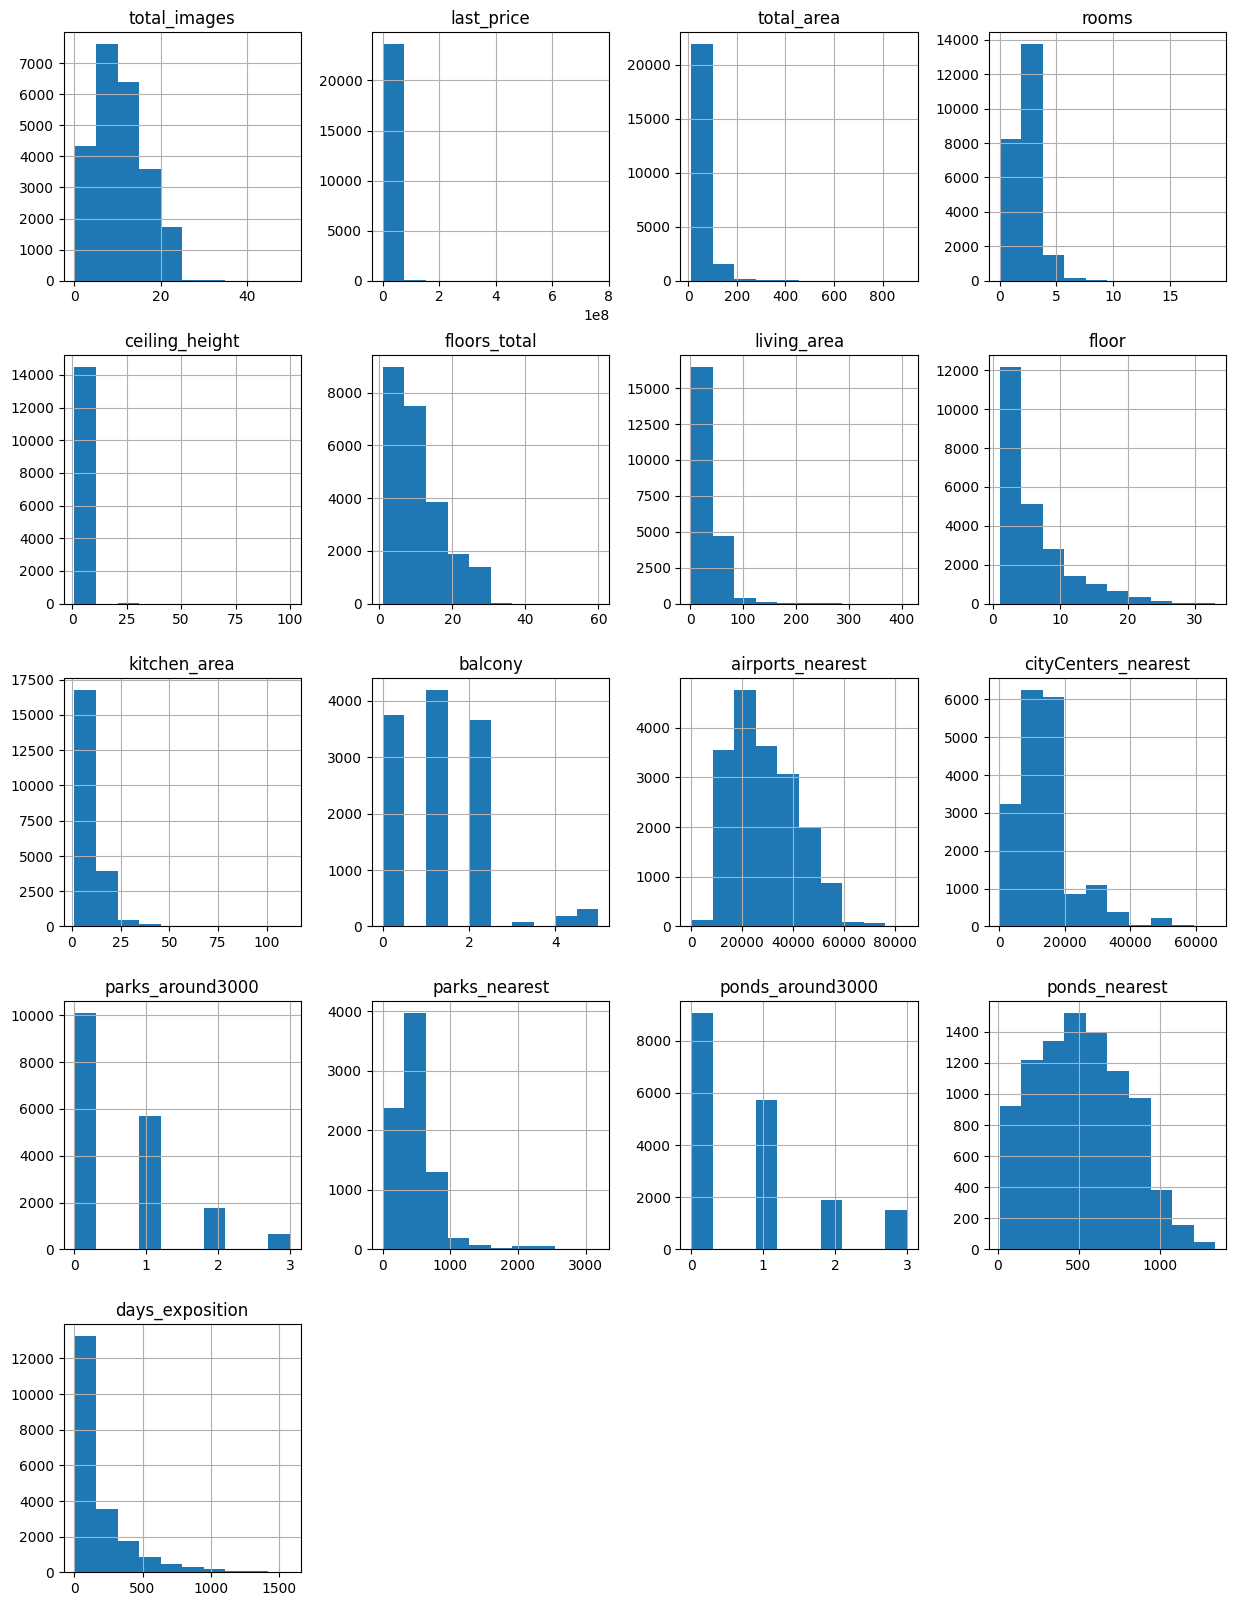

In [6]:
data.hist(figsize=(15, 20));

В данном разделе представлены общие данные о датасете.

**Вывод по разделу 1:**
- В данной таблице 20 столбцов, содержащих различную информацию о квартирах, выставленных на продажу.
- В 13 столбцах присутствуют пропуски, по возможности их необходимо заполнить. Также 6 столбцов нуждаются в изменении типов данных.
- В некоторых солбцах заметны аномальные значения, а в столбце с названиями населённых пунктов присутствуют неявные дубликаты.

## 2. <a id='toc2_'></a>[Предобработка данных](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Обработка пропуcков](#toc0_)

В определённых столбцах присутствуют пропуски, причём заполнять некоторые из них некорректно: 
название населённого пункта; картографические данные, там, где они отсутствуют полностью.
    
Жилая площадь, как и площадь кухни, всегда меньше общей площади квартиры. Можно узнать, какую часть общей площади они занимают в среднем, и вычислить их, используя полученные значения.

In [7]:
living_area_ratio = (data['living_area'] / data['total_area']).mean()
kitchen_area_ratio = (data['kitchen_area'] / data['total_area']).mean()
living_area_ratio, kitchen_area_ratio

(0.5647655216993234, 0.1873547387717406)

<div class='alert alert-info'>
    <b>Исправлено</b>
</div>

In [8]:
living_area_ratio = (data['living_area'] / data['total_area']).median()
kitchen_area_ratio = (data['kitchen_area'] / data['total_area']).median()
print(f'Медианная доля жилой площади: {living_area_ratio}\n'
      f'Медианная доля площади кухни: {kitchen_area_ratio}')

Медианная доля жилой площади: 0.5678598992678503
Медианная доля площади кухни: 0.1724137931034483


In [9]:
(data['living_area'].fillna(
    data.loc[data.living_area.isna(), 'total_area'] * living_area_ratio, 
    inplace=True))

(data['kitchen_area'].fillna(
    data.loc[data.kitchen_area.isna(), 'total_area'] * kitchen_area_ratio, 
    inplace=True))

Пропуски в высоте потолка заполним медианой.

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Если число этажей не указано, считаем, что текущий этаж - предпоследний (чтобы автоматически заполненные строки в дальнейшем не попадали в категорию "Последний").

In [11]:
data['floors_total'].fillna(data.floor + 1, inplace=True)

Пропуски в столбце `is_apartment` можно заполнить значениями `False`: предположительно квартира не является апартаментами, если об этом не сказано.

In [12]:
data['is_apartment'].fillna(False, inplace=True)

Если не указано количество балконов, то предположим, что их нет совсем.

In [13]:
data['balcony'].fillna(0, inplace=True)

Пропуски в столбце местоположений заполним строкой `Неизвестно`.

In [14]:
data['locality_name'].fillna('Неизвестно', inplace=True)

Изучим количество пропусков в картографических данных: расстояние до ближайших водоёмов и парков.

In [15]:
print('Объялений с отсутствием парка вблизи:', len(s := data.query('parks_around3000 == 0')),
      '\nПропусков в расстоянии среди них:', len(s.query('parks_nearest.isna()')))

print('\nОбъялений с отсутствием водоёма вблизи:', len(s := data.query('ponds_around3000 == 0')),
      '\nПропусков в расстоянии среди них:', len(s.query('ponds_nearest.isna()')))

print('\nМаксимальное расстояние до парка:', park_max_dist := data.parks_nearest.max())
print('Максимальное расстояние до водоёма:', pond_max_dist := data.ponds_nearest.max())

Объялений с отсутствием парка вблизи: 10106 
Пропусков в расстоянии среди них: 10102

Объялений с отсутствием водоёма вблизи: 9071 
Пропусков в расстоянии среди них: 9071

Максимальное расстояние до парка: 3190.0
Максимальное расстояние до водоёма: 1344.0


Пропуски в картографических данных заполним значением `-1`.

In [16]:
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'] = -1
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = -1

Пропуски в значениях, вводимых пользователем, можно объяснить: не все продавцы выкладывали полную информацию о своих квартирах.
    
Картографические же данные пропущены, скорее всего, потому что при определении географических координат был известен точный адрес не всех квартир.
    
Если не указана длительность размещения объявления, возможно, квартира ещё не продана. Также это может быть связано с техническими проблемами при выгрузке данных.

### 2.2. <a id='toc2_2_'></a>[Изменение типов данных](#toc0_)

Столбцы с информацией о стоимости, количестве этажей и балконов, а также количестве близлежащих парков и водоёмов должны иметь целочисленный тип.

In [17]:
columns_to_change = ['last_price', 'floors_total', 'balcony', 'parks_around3000' ,'ponds_around3000']
data[columns_to_change] = data[columns_to_change].astype('Int64')

Столбец с датами преобразуем к типу `datetime`, оставив только число, месяц и год.

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

### 2.3. <a id='toc2_3_'></a>[Устранение дубликатов](#toc0_)

При устранении неявных дубликатов в столбце с названиями населённых пунктов можно предположить, что их названия состоят только из слов, начинающихся с больших букв. Проверим это предположение.

In [19]:
import re

def get_locality_name(string):
    return ' '.join(re.findall('[А-Я][\w-]+', string))


print('Количество строк, где нет больших букв:', data.locality_name.apply(str).apply(get_locality_name).isna().sum(), '\n')
print('Список населённых пунктов:')
sorted(data.locality_name.apply(str).apply(get_locality_name).unique())

Количество строк, где нет больших букв: 0 

Список населённых пунктов:


['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Заметим: при таком способе не будет неявных дубликатов, а также пропусков.

In [20]:
data['locality_name'] = data['locality_name'].apply(str).apply(get_locality_name)

### 2.4. <a id='toc2_4_'></a>[Устранение аномалий](#toc0_)

В некоторых строках в столбце с высотой потолка присутствуют аномально большие значения.

In [21]:
data.loc[data['ceiling_height'] > 6, 'ceiling_height'].value_counts()

27.0     8
25.0     7
8.0      3
32.0     2
24.0     1
26.0     1
8.3      1
14.0     1
20.0     1
22.6     1
27.5     1
10.3     1
100.0    1
Name: ceiling_height, dtype: int64

Можно предположить, что значения высоты от `20 м` до `32 м` нужно разделить на 10, остальные - удалим. Также удалим строки, в которых высота потолка ниже `2 м`.

In [22]:
data.loc[(20 <= data['ceiling_height']) & (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10
data.drop(data.query('ceiling_height < 2 or ceiling_height > 6')['ceiling_height'].index, inplace=True)

Также есть строки, где число комнат - 0.

In [23]:
data.loc[data.rooms == 0, 'rooms'].count()

197

Найдём медианную площадь одной комнаты и заменим с её помощью ошибочные значения.

<div class='alert alert-info'>
    <b>Исправлено</b>
</div>

In [24]:
median_room_area = (data['total_area'] / data['rooms']).median()
data.loc[(data.rooms == 0) & (data.studio == False), 'rooms'] = (data['total_area'] / median_room_area).clip(1).astype(int)

Данные в остальных столбцах выглядят естественно.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23689 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23689 non-null  int64         
 1   last_price            23689 non-null  Int64         
 2   total_area            23689 non-null  float64       
 3   first_day_exposition  23689 non-null  datetime64[ns]
 4   rooms                 23689 non-null  int64         
 5   ceiling_height        23689 non-null  float64       
 6   floors_total          23689 non-null  Int64         
 7   living_area           23689 non-null  float64       
 8   floor                 23689 non-null  int64         
 9   is_apartment          23689 non-null  bool          
 10  studio                23689 non-null  bool          
 11  open_plan             23689 non-null  bool          
 12  kitchen_area          23689 non-null  float64       
 13  balcony         

В данном разделе были обработаны пропуски в данных, устранены дубликаты и аномалии, при необходимости изменены типы данных.

### 2.5. <a id='toc2_5_'></a>[Добавление новых столбцов](#toc0_)

Добавим в таблицу следующие столбцы:
- Цена одного квадратного метра - `square_meter_price`.
- День недели публикации объявлеия - `exposition_weekday`.
- Месяц публикации объявления - `exposition_month`.
- Год публикации объявления - `exposition_year`.

In [26]:
data['square_meter_price'] = (data['last_price'] / data['living_area']).astype(int)

data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

data['exposition_month'] = data['first_day_exposition'].dt.month

data['exposition_year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры - `floor_type`.

In [27]:
def categorize_by_floor(row):
    if row.floor == 1:
        return 'Первый'
    elif row.floor == row.floors_total:
        return 'Последний'
    return 'Другой'


data['floor_type'] = data.apply(categorize_by_floor, axis=1)

Расстояние до центра города в километрах - `center_distance_km`.

In [28]:
data['center_distance_km'] = (data.cityCenters_nearest // 1000).clip(1).astype('Int64')

Теперь таблица имеет вид:

In [29]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,center_distance_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,254901,3,3,2019,Другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,-1.0,0,-1.0,81.0,180107,1,12,2018,Первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,151486,3,8,2015,Другой,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.289724,9,False,...,84.0,3,234.0,424.0,718797,4,7,2015,Другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,312500,1,6,2018,Другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,<NA>,NaN,55.0,200694,0,9,2018,Другой,<NA>
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,-1.0,0,-1.0,155.0,349056,3,11,2017,Другой,19
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.658769,22,False,...,-1.0,0,-1.0,NaN,194668,3,4,2019,Другой,11
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,<NA>,NaN,189.0,187945,2,5,2018,Другой,<NA>
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,-1.0,0,-1.0,289.0,123853,6,2,2017,Другой,15


В данном разделе были добавлены в таблицу новые столбцы.

## 3. <a id='toc3_'></a>[Исследовательский анализ данных](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Общие характеристики параметров](#toc0_)

Изучим различные параметры объектов.

Рассмотрим гистограмму общей площади. Чтобы лучше увидеть распределение, ограничимся квартирами до `200 м2`.

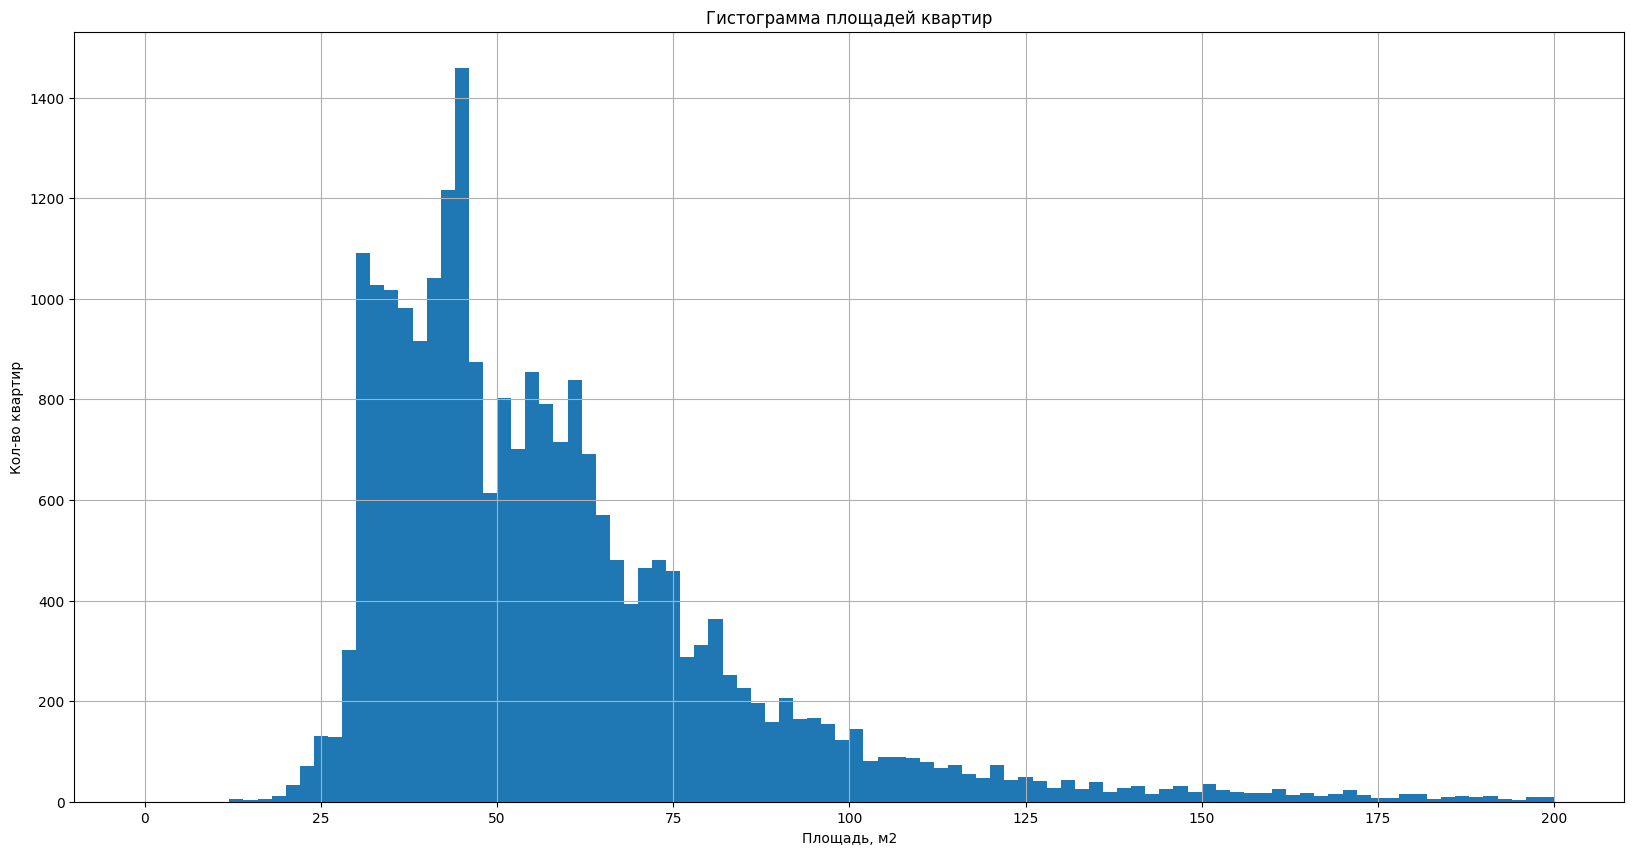

In [30]:
ax = data['total_area'].hist(bins=100, range=(0, 200), figsize=(20,10))\
        .set(title = 'Гистограмма площадей квартир', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир')

Большой пик наблюдается в районе `50 м2`, квартир площадью больше `300 м2` крайне мало. Также стоит изучить статистические характеристики.

In [31]:
data.total_area.describe()

count    23689.00000
mean        60.35470
std         35.65954
min         12.00000
25%         40.00000
50%         52.00000
75%         69.90000
max        900.00000
Name: total_area, dtype: float64

Также стоит отметить, что большая часть всех квартир (75%) имеют площадь менее `70 м2`.

Теперь изучим столбец с жилой площадью.

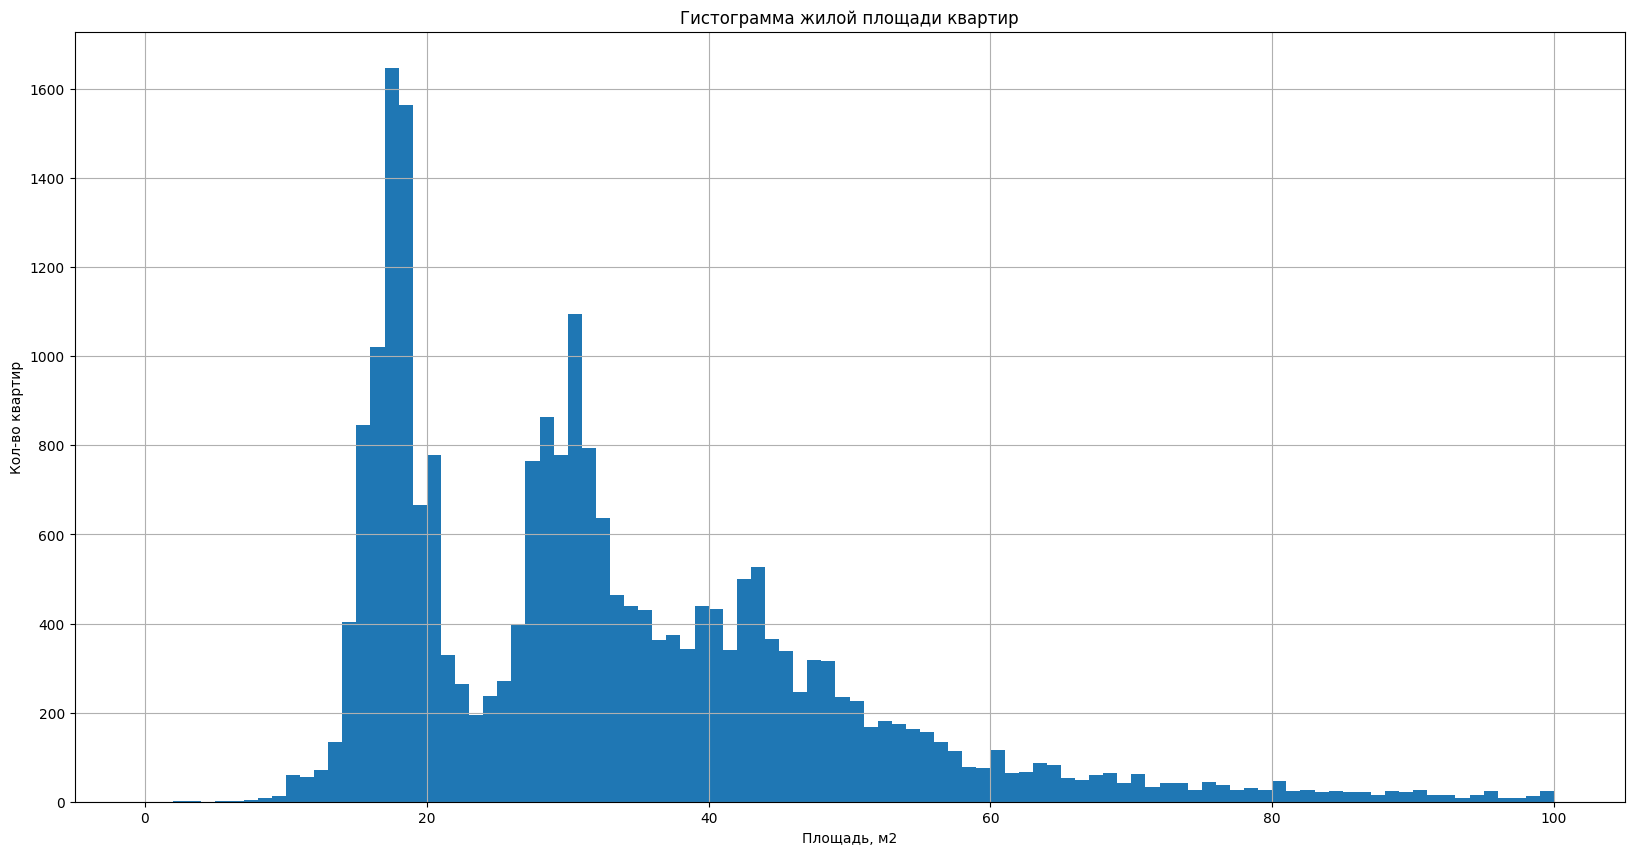

In [32]:
ax = data.living_area.hist(bins=100, range=(0, 100), figsize=(20,10))\
    .set(title = 'Гистограмма жилой площади квартир', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир')

На данном графике наблюдаются уже 2 пика - `18 м2` и `30 м2` - это, скорее всего, стандартные однокомнатные и двухкомнатные квартиры соответственно. Также немного выделяется значение `40 м2` - предположительно трёхкомнатные.

Далее - площадь кухни.

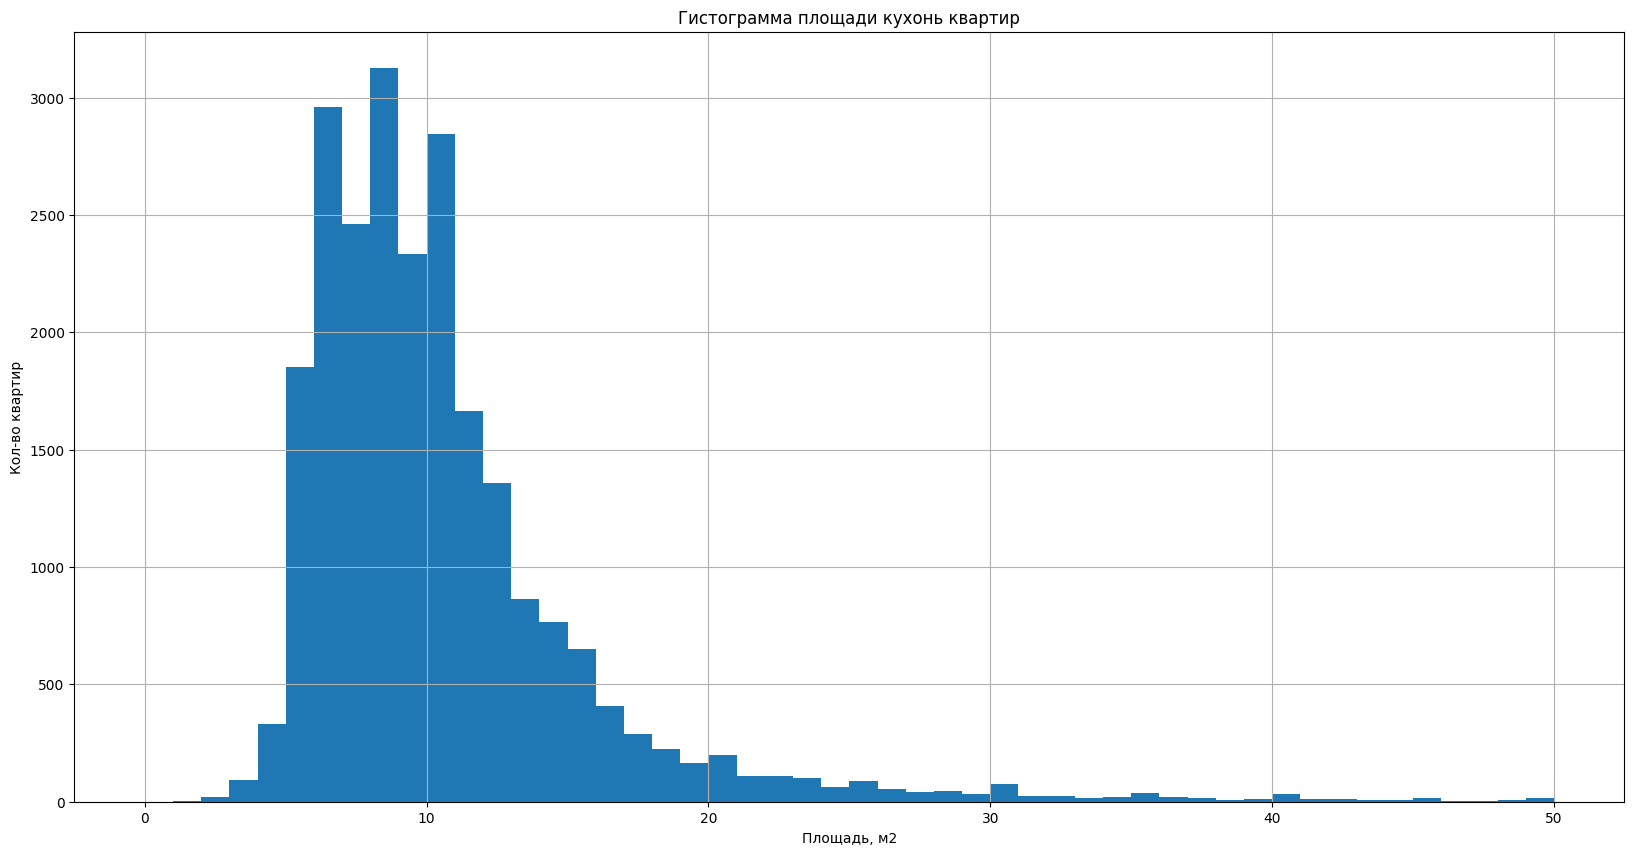

In [33]:
ax = data.kitchen_area.hist(bins=50, range=(0, 50), figsize=(20,10))\
        .set(title = 'Гистограмма площади кухонь квартир', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир')

Наиболее часто встречаются кухни площадью `8 м2` и `11 м2`. Довольно мало квартир с кухнями более `45 м2`.

Цена объекта:

count            23689.0
mean      6541967.340833
std      10889048.980793
min              12190.0
25%            3400000.0
50%            4650000.0
75%            6800000.0
max          763000000.0
Name: last_price, dtype: Float64

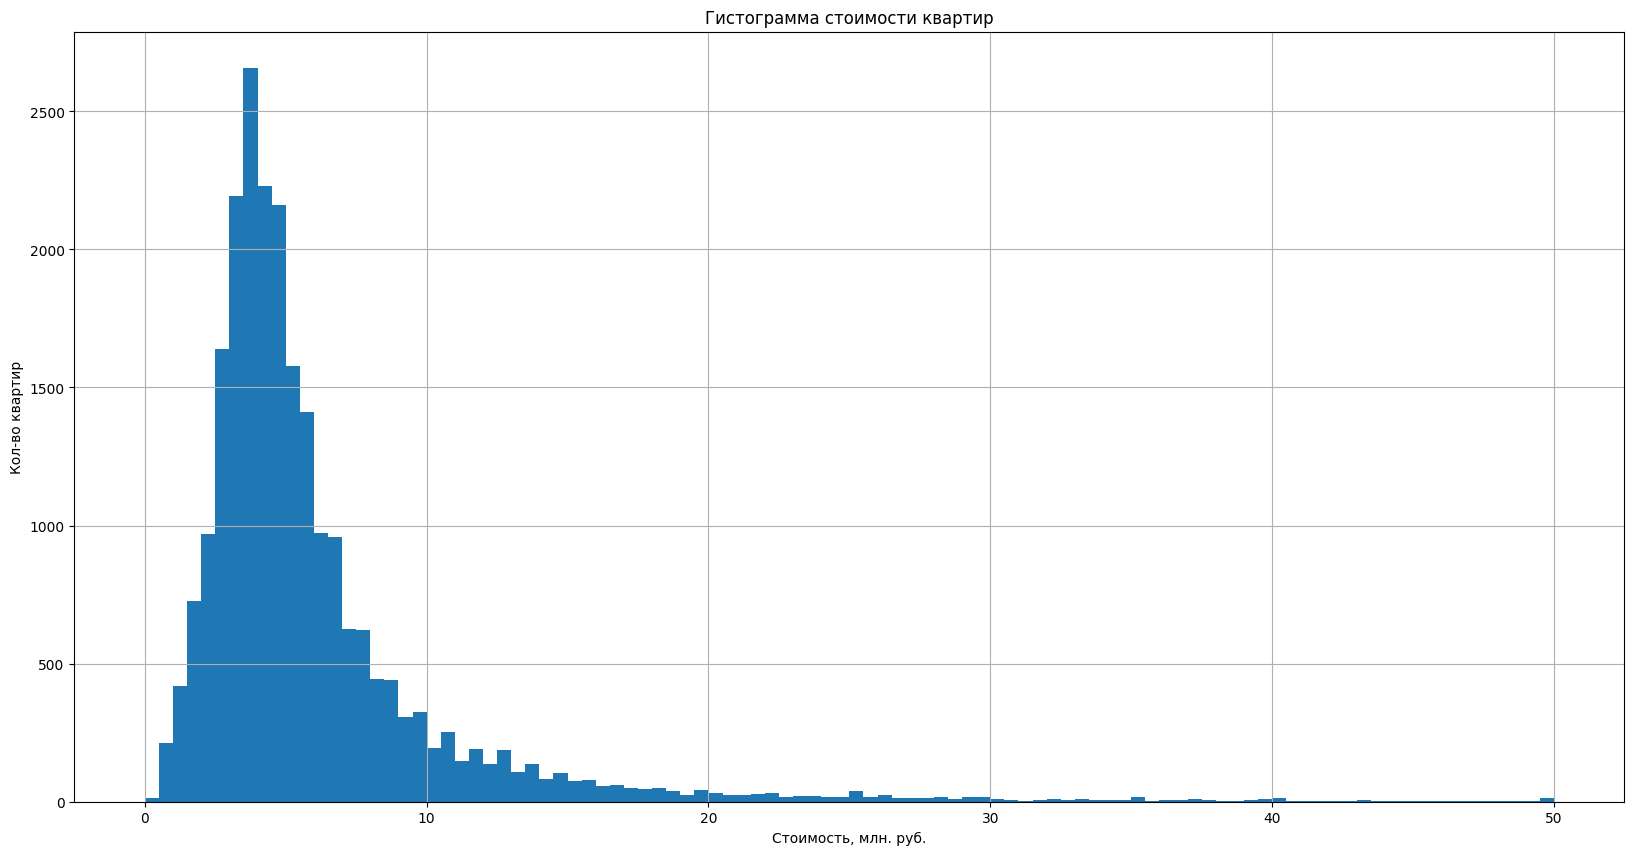

In [34]:
ax = data.last_price.apply(lambda x: x/1_000_000).hist(bins=100, range=(0, 50), figsize=(20,10))\
        .set(title = 'Гистограмма стоимости квартир', xlabel = 'Стоимость, млн. руб.', ylabel = 'Кол-во квартир')
data.last_price.describe()

Большинство квартир стоят от `3 млн. руб.` до `7 млн. руб.`, стоимостью выше `40 млн. руб.` совсем немного.

Рассмотрим распределение числа комнат.

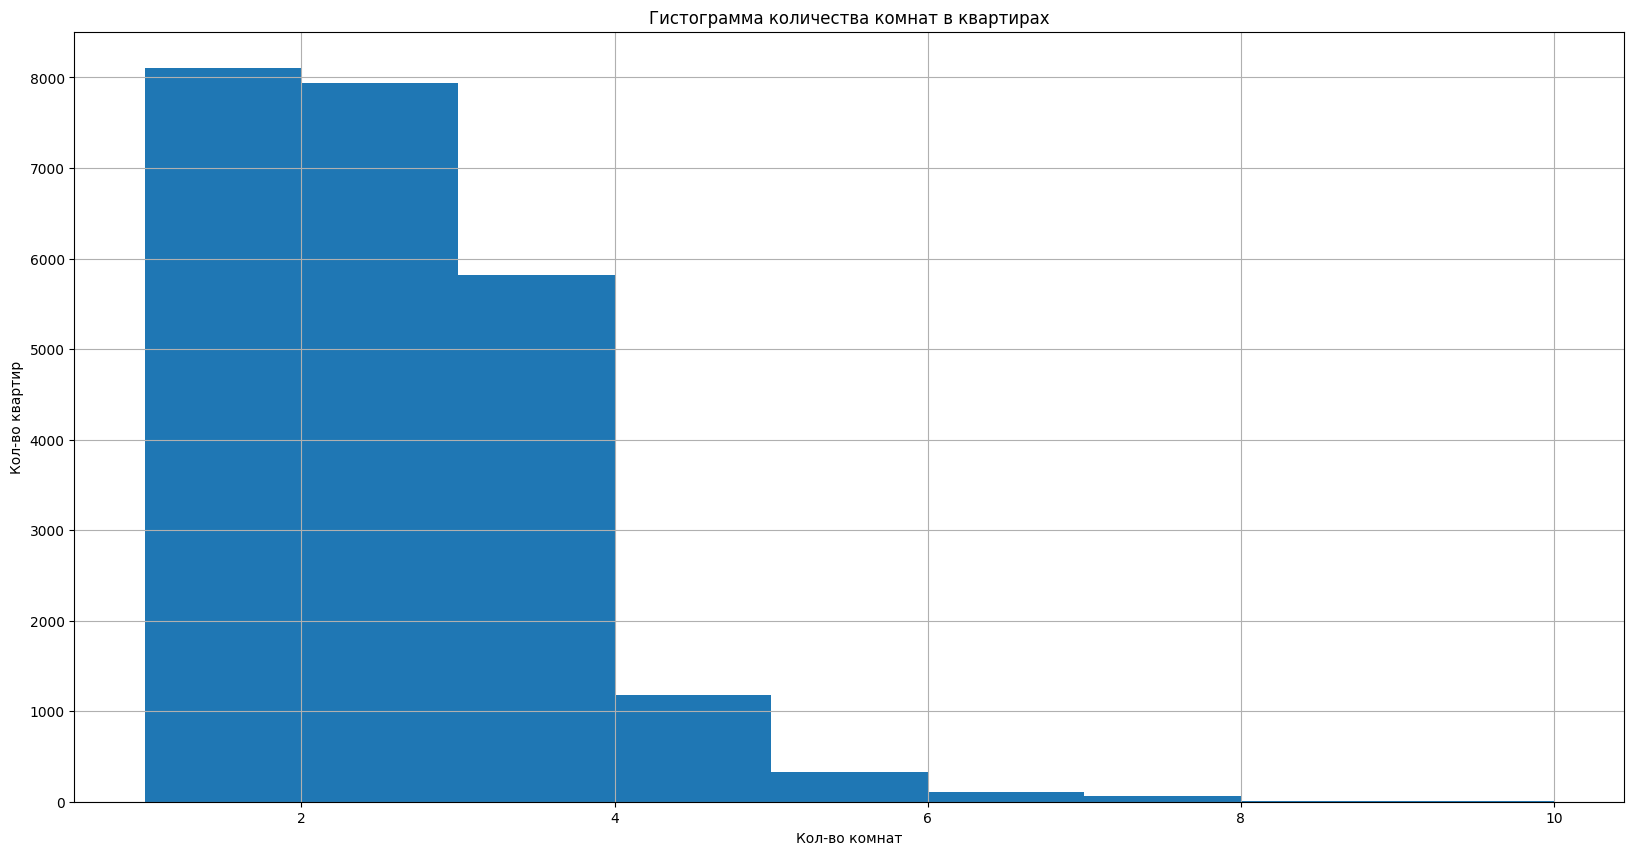

In [35]:
ax = data.rooms.hist(bins=9, range=(1, 10), figsize=(20,10))\
        .set(title = 'Гистограмма количества комнат в квартирах', xlabel = 'Кол-во комнат', ylabel = 'Кол-во квартир')

В большинстве квартир меньше от одной до трёх комнат, почти во всех - менее 10.

Изучим теперь высоту потолков.

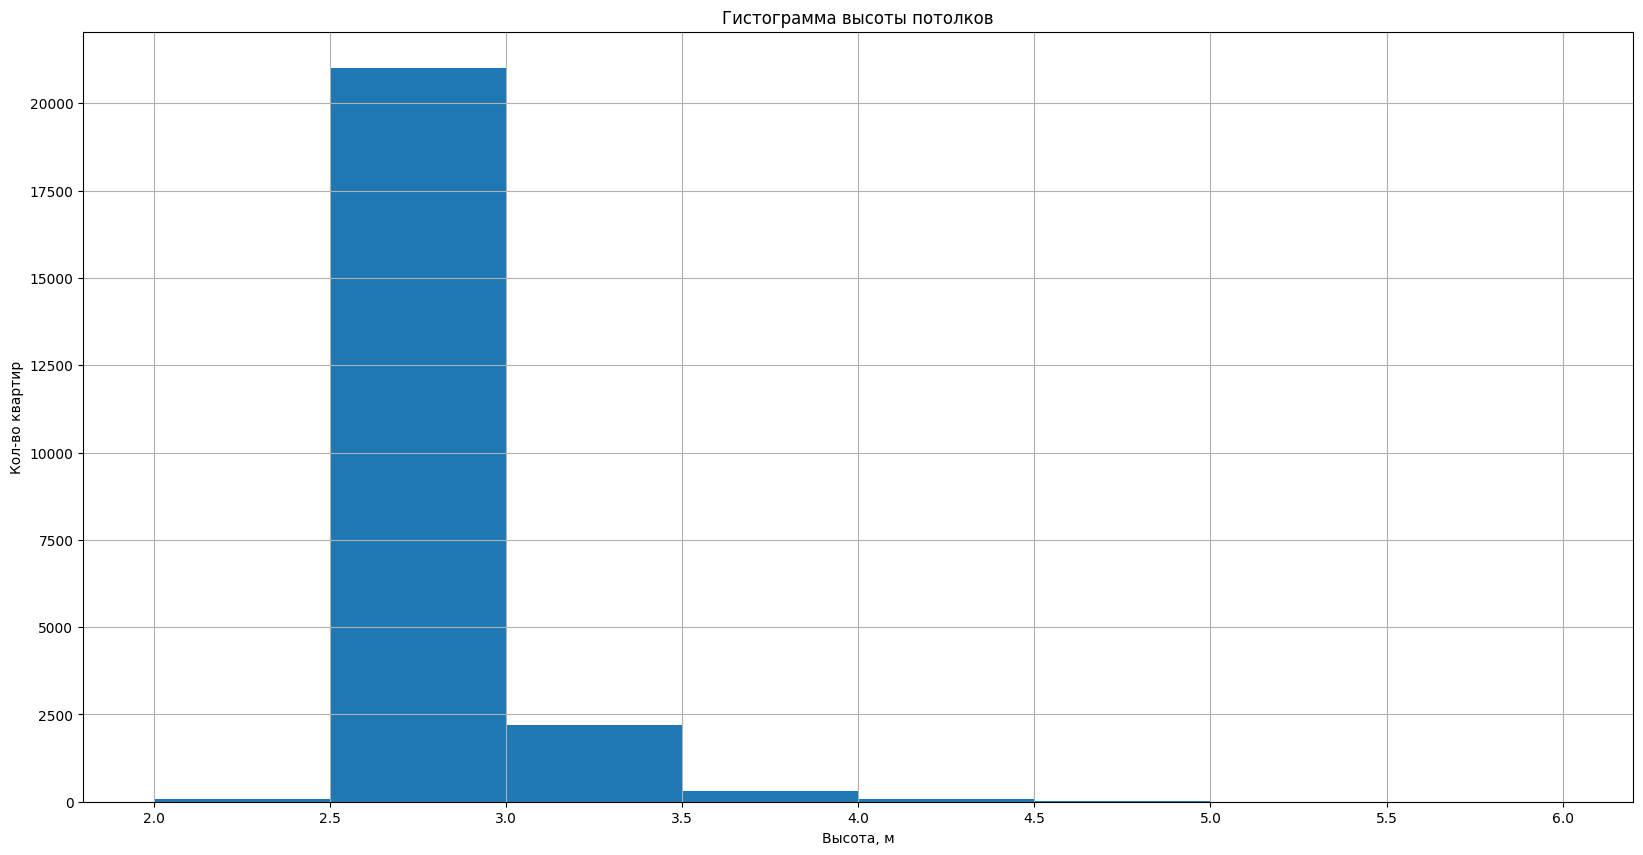

In [36]:
ax = data.ceiling_height.hist(bins=8,figsize=(20,10))\
        .set(title = 'Гистограмма высоты потолков', xlabel = 'Высота, м', ylabel = 'Кол-во квартир')

Как правило, высота потолков в квартирах составляет `2.5 м - 3 м`, иногда доходит до `4.5 м`.

Далее рассмотрим гистограмму этажей квартир.

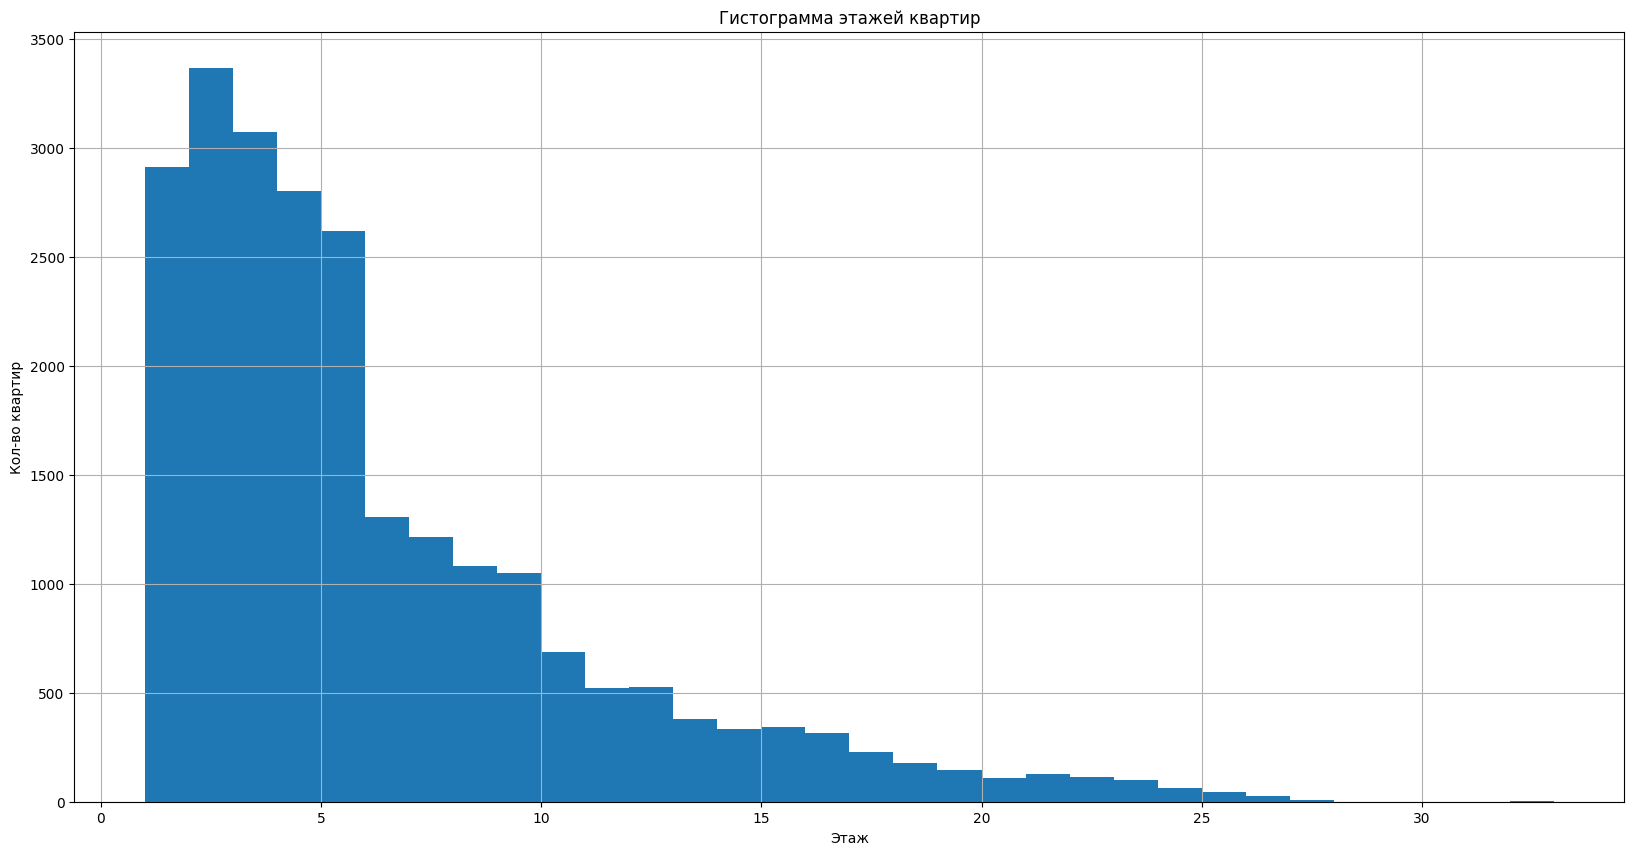

In [37]:
ax = data.floor.hist(bins=32, figsize=(20,10))\
        .set(title = 'Гистограмма этажей квартир', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

По этому параметру заметно чёткое разделение: большинство квартир находятся на пятом этаже и ниже - скорее всего в пятиэтажках, также много квартир до 9 этажа - девятиэтажки, остальные - высотки.

Также интересно рассмотреть распределение по типу этажа.

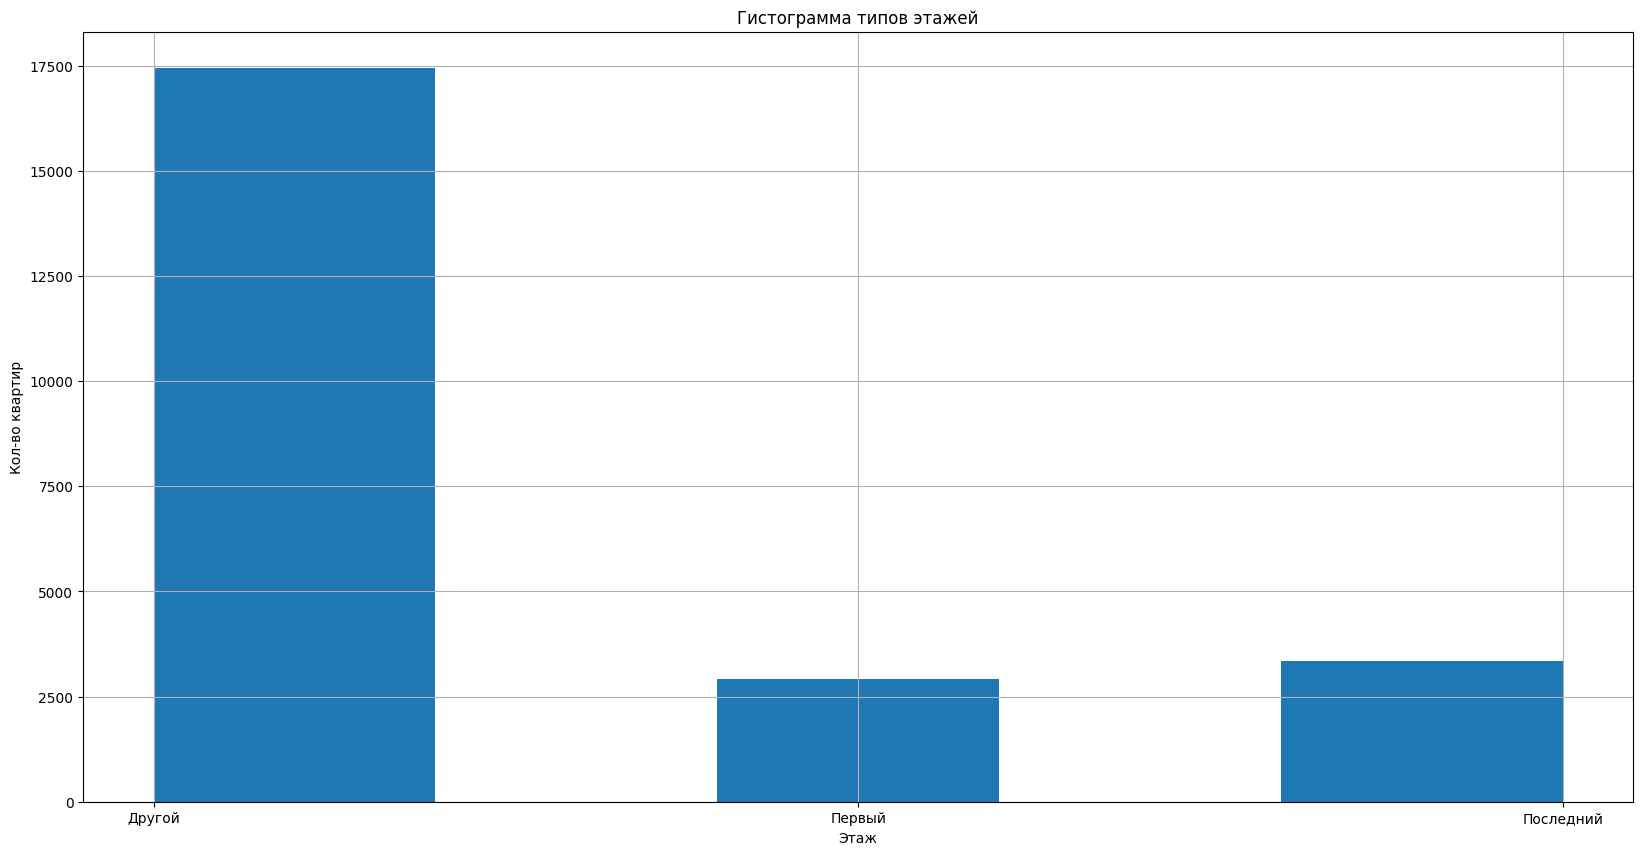

In [38]:
ax = data.floor_type.hist(bins=5, figsize=(20,10))\
        .set(title = 'Гистограмма типов этажей', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

Квартир на последнем этаже немного больше, чем на первом, но подавляющее большинство квартир расположены на других этажах.

Кроме того, изучим общее количество этаже в доме.

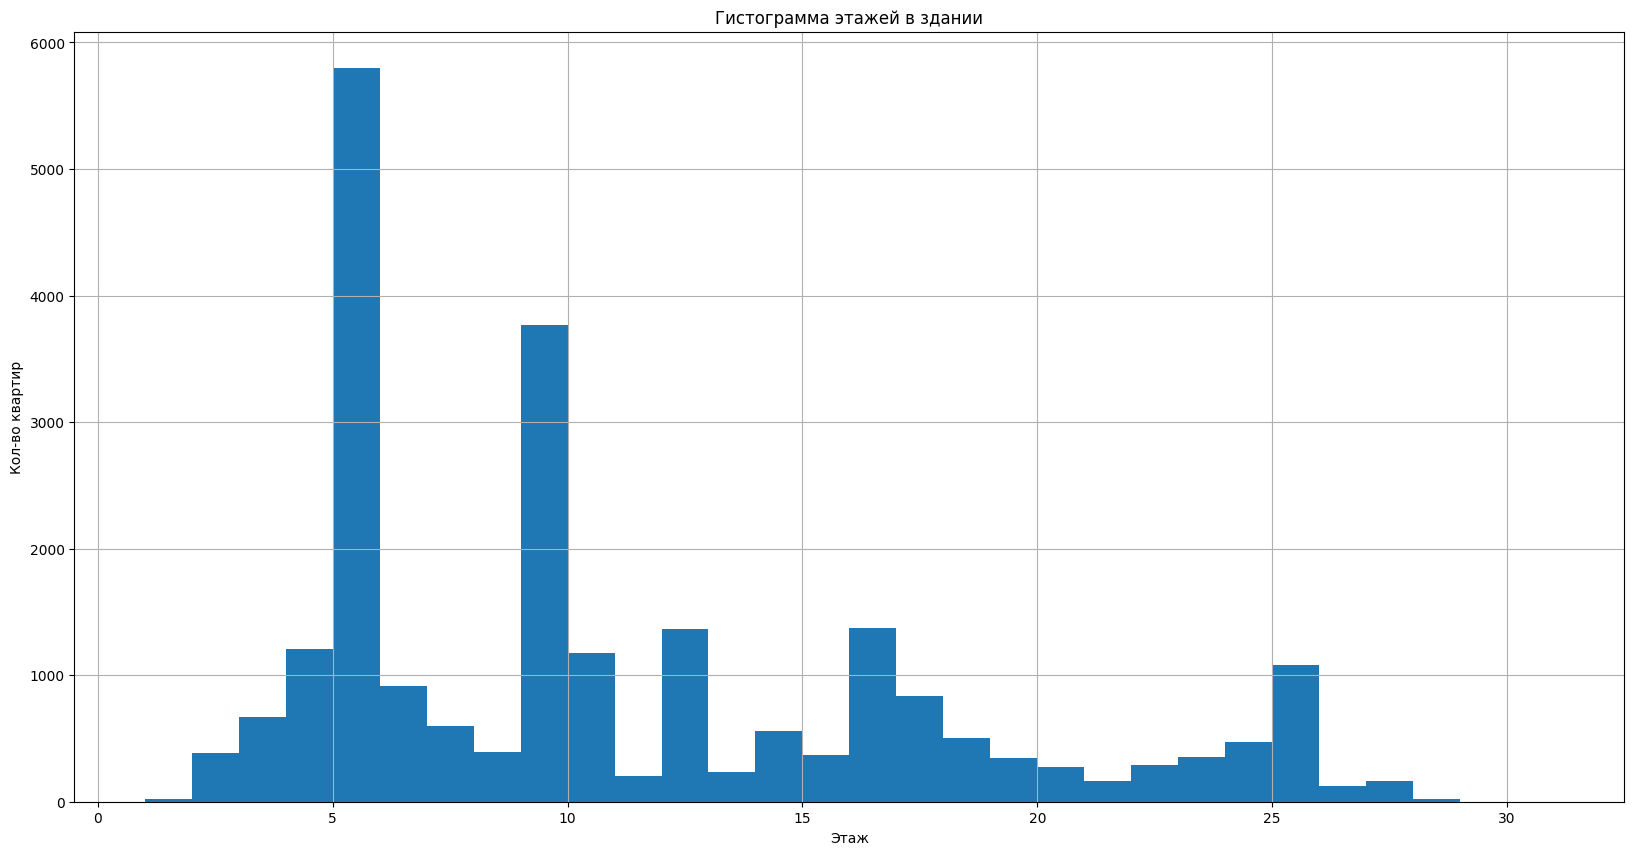

In [39]:
ax = data.floors_total.hist(bins=30, range=(1, 31), figsize=(20,10))\
        .set(title = 'Гистограмма этажей в здании', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

Наиболее часто встречаются здания со следующим числом этажей - 5, 9, реже - 4, 10, 12, 16, 25, остальные - совсем редко.

Далее - расстояние до центра города.

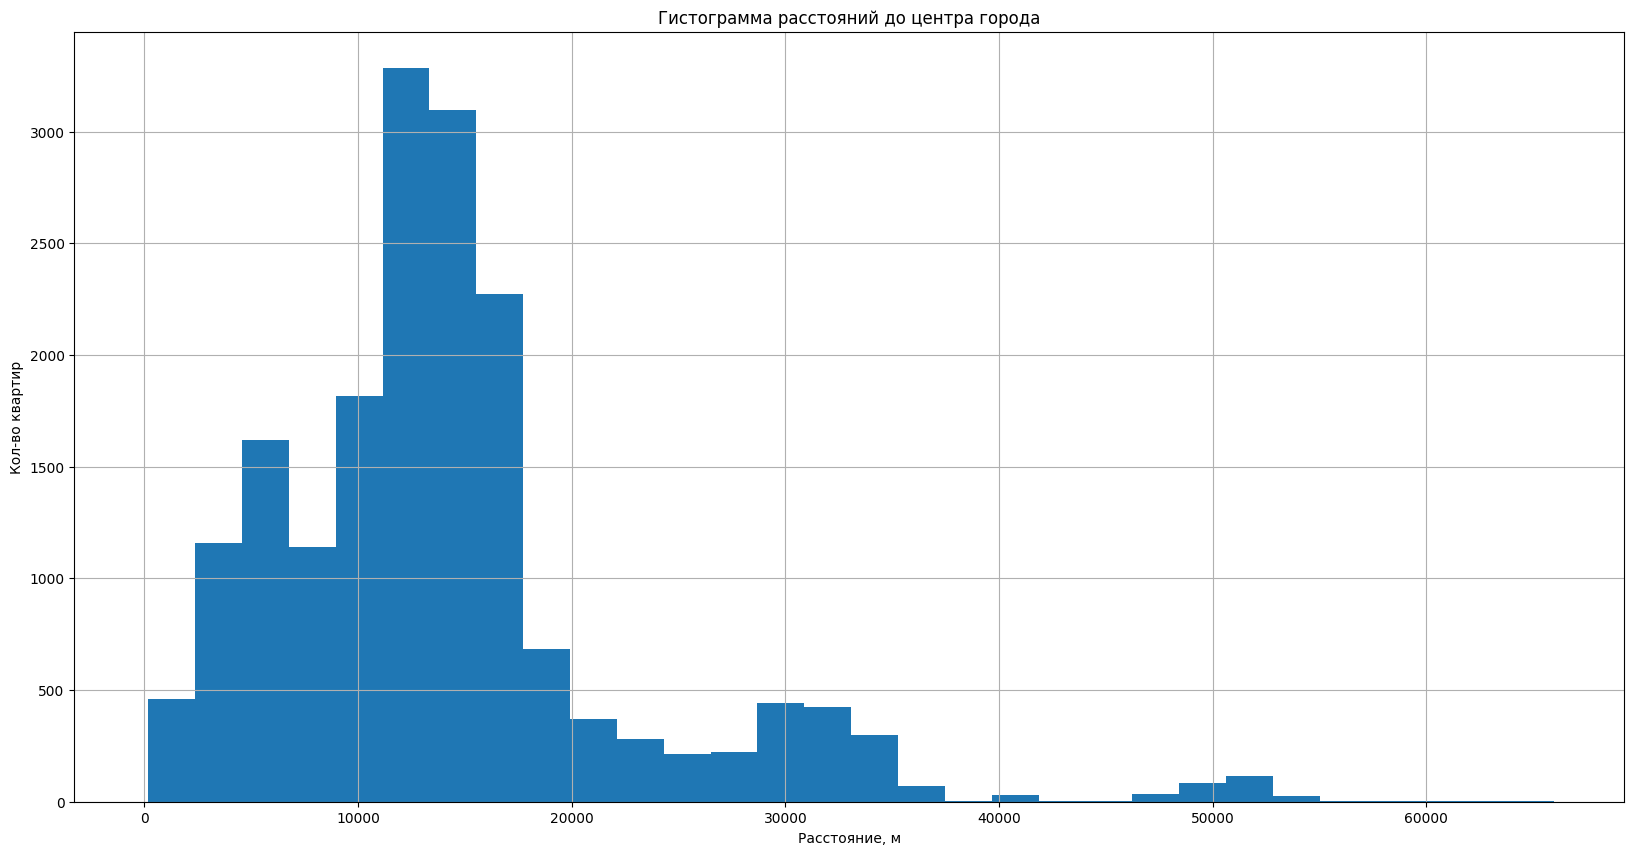

In [40]:
data.cityCenters_nearest.hist(bins=30)
ax = data.cityCenters_nearest.hist(bins=60, range=(20, 125), figsize=(20,10))\
        .set(title = 'Гистограмма расстояний до центра города', xlabel = 'Расстояние, м', ylabel = 'Кол-во квартир')

Довольно много квартир находятся в районе 12-16 км от центра, также локальные максимумы наблюдаются около 5 и 30 км.

Расстояние до ближайшего аэропорта:

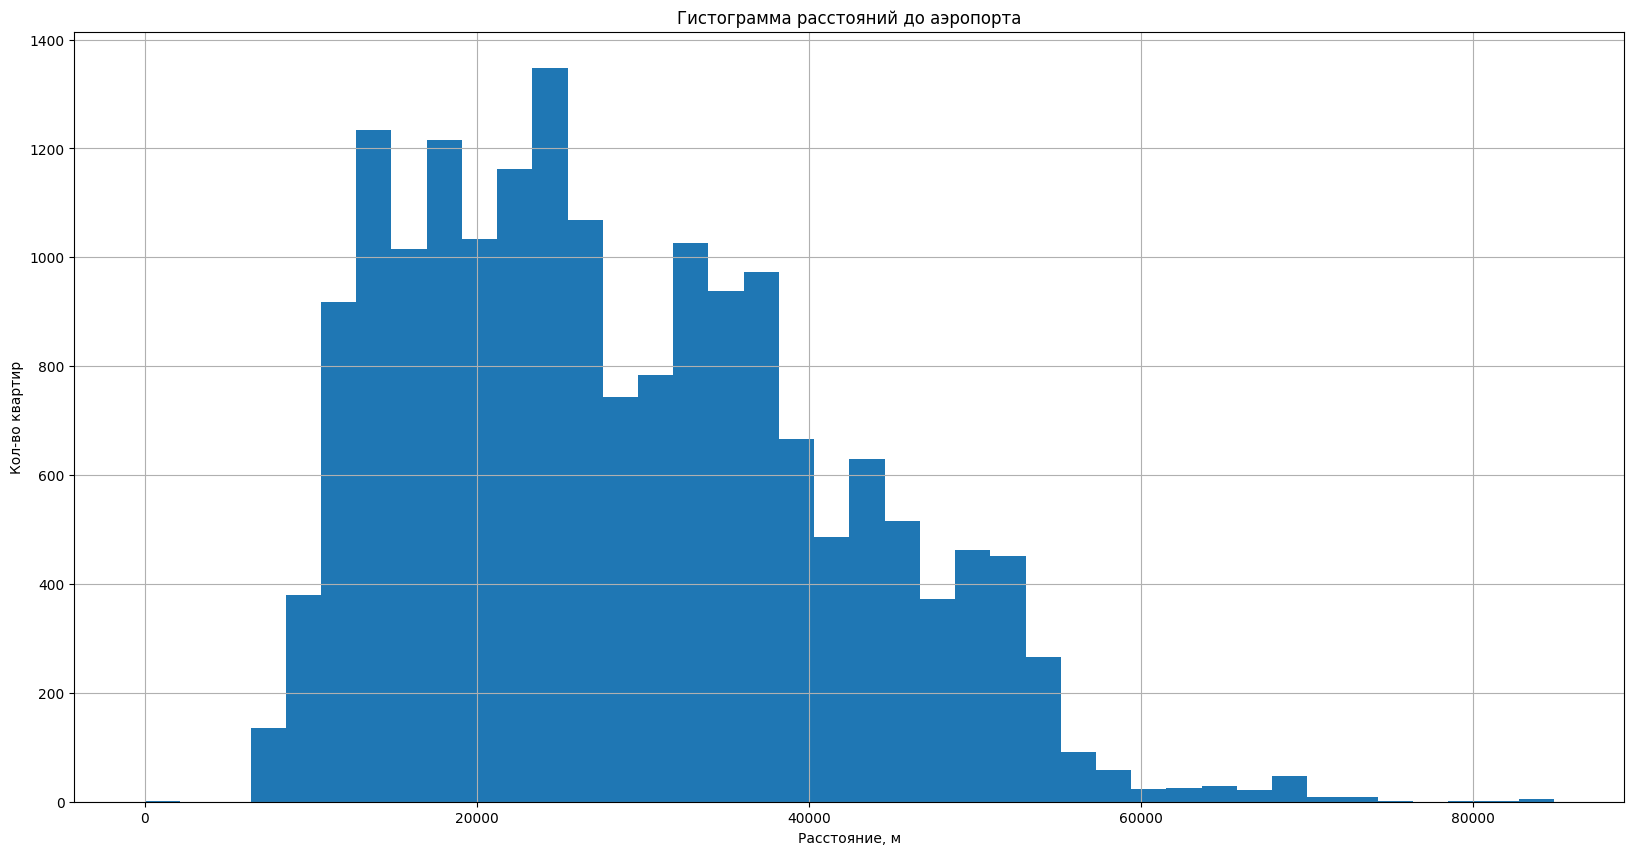

In [41]:
ax = data.airports_nearest.hist(bins=40, figsize=(20,10))\
        .set(title = 'Гистограмма расстояний до аэропорта', xlabel = 'Расстояние, м', ylabel = 'Кол-во квартир')

Наблюдается явный пик в районе `22 000 м` от центра города, практически все квартиры расположены в `10-60 км` от него.

Расстояние до ближайшего парка:

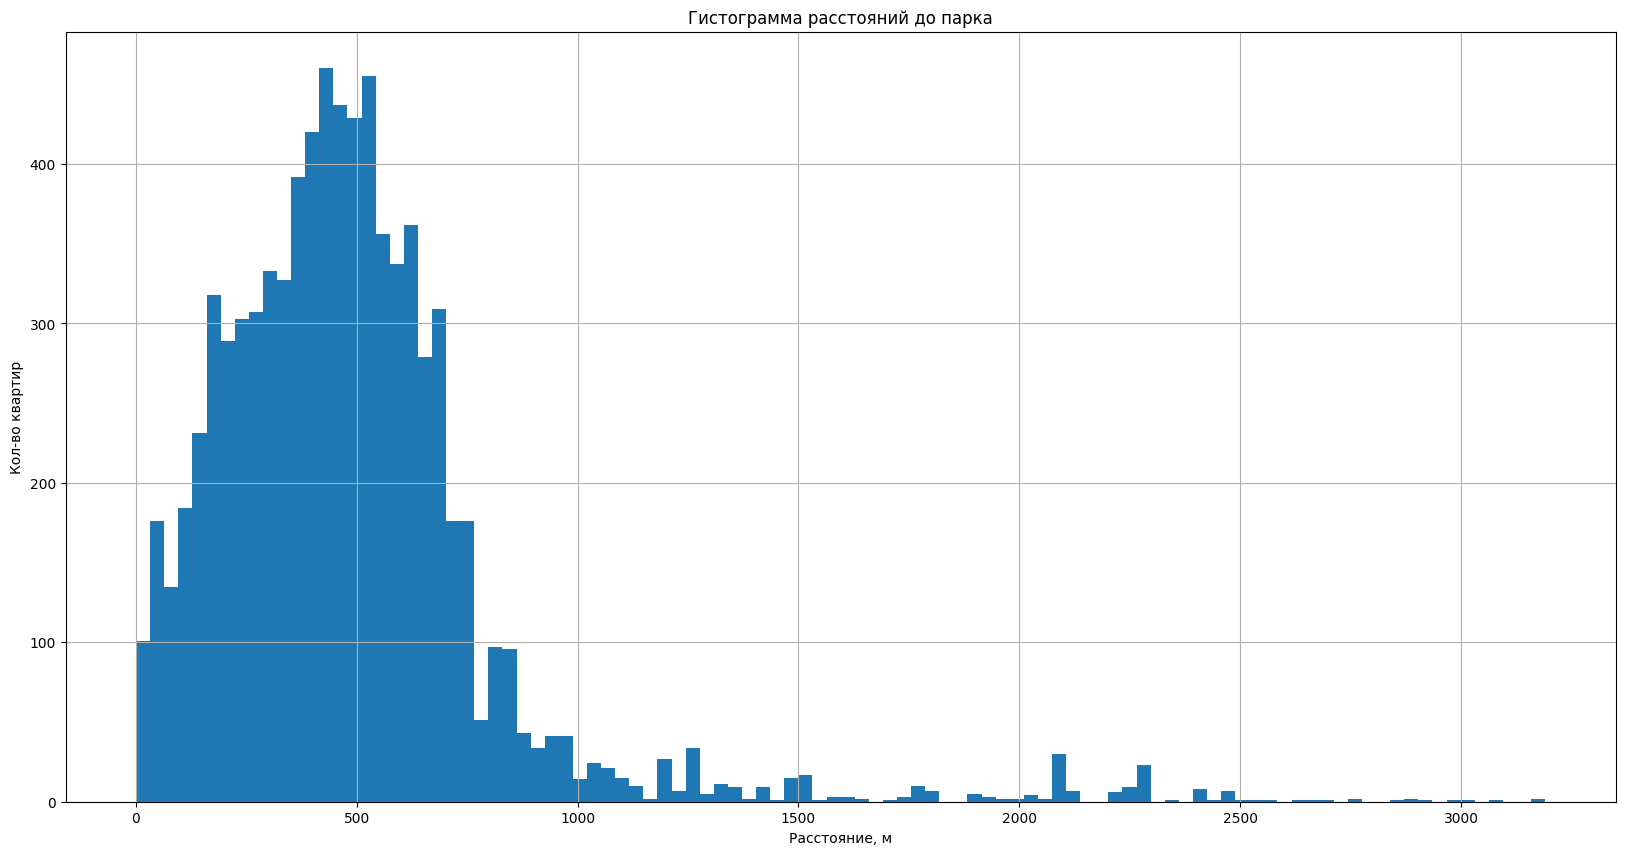

In [42]:
ax = data.loc[data.parks_nearest > 0, 'parks_nearest'].hist(bins=100, figsize=(20,10))\
        .set(title = 'Гистограмма расстояний до парка', xlabel = 'Расстояние, м', ylabel = 'Кол-во квартир')

У подавляющего большинства квартир нет парков в радиусе `3 км` от них. У остальных парки находятся рядом (менее `1 км`).

День и месяц публикации объявления:

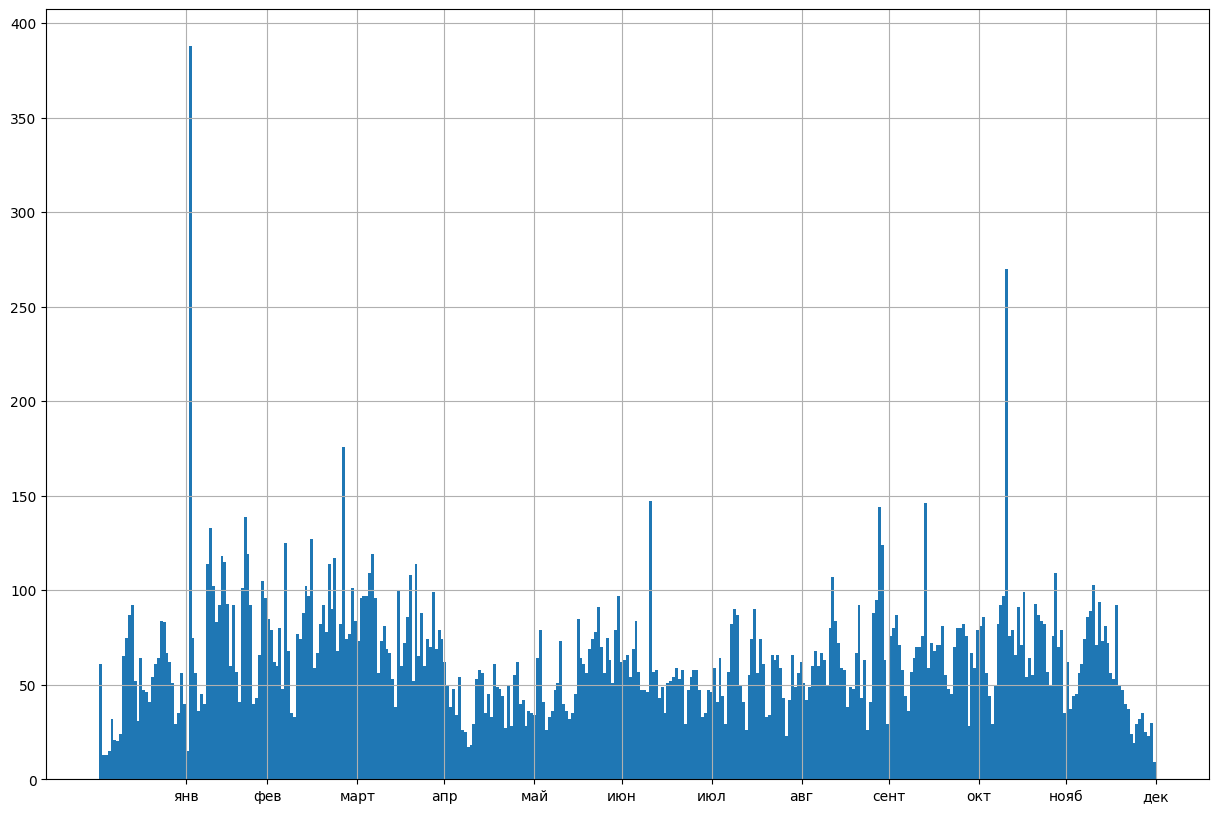

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
ticks = pd.Series(pd.date_range(start='1/1/2018', end='12/31/2018', freq='m')).dt.dayofyear
ax.set_xticks(ticks)
ax.set_xticklabels(['янв', 'фев', 'март', 'апр', 'май', 'июн', 'июл', 'авг', 'сент', 'окт', 'нояб', 'дек'])
data.first_day_exposition.dt.dayofyear.hist(bins=365, figsize=(15, 10));

Из графика следует, что наиболее часто квартиры выставляются ранней весной и осенью (пики - февраль и ноябрь), летом - не так часто, реже всего - в мае (видимо, из-за праздников).

### 3.2. <a id='toc3_2_'></a>[Скорость продажи квартир](#toc0_)

Рассмотрим гистограмму.

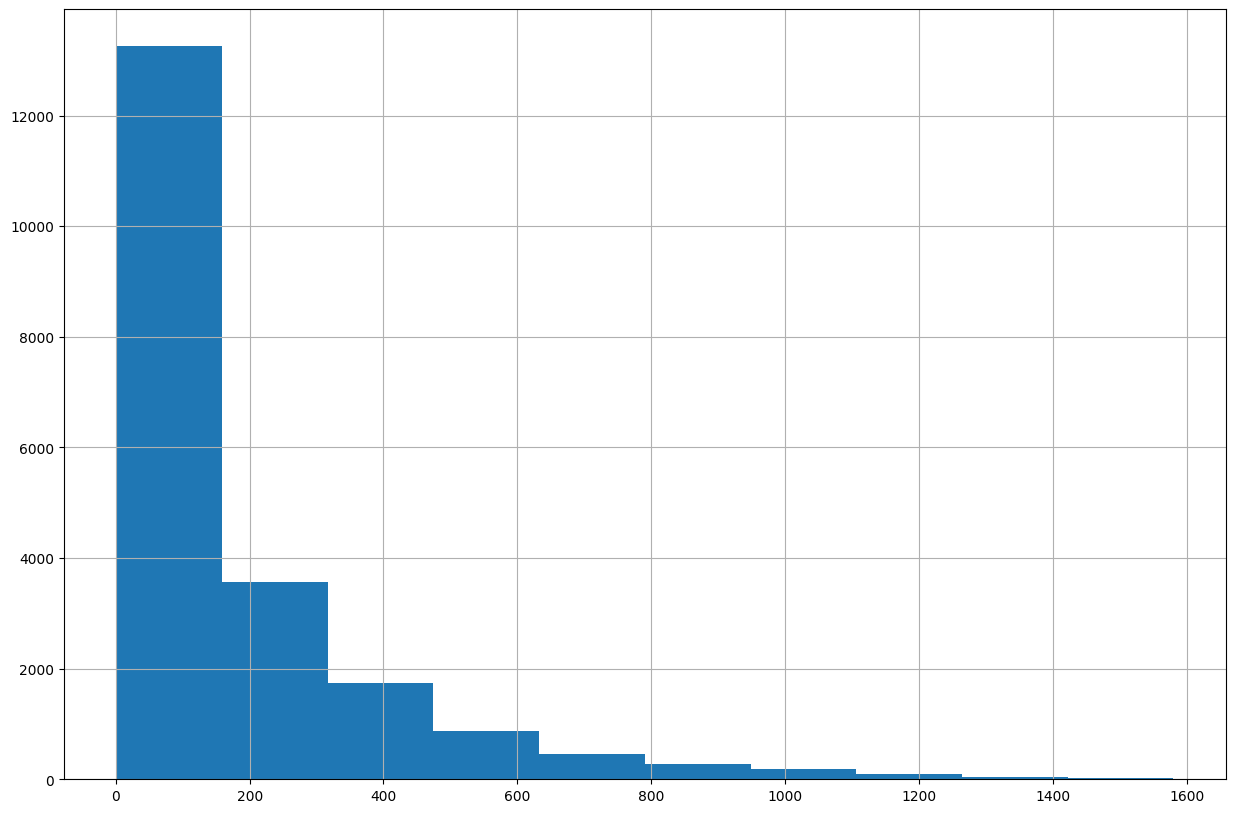

In [44]:
data.days_exposition.hist(figsize=(15, 10));

Статистические данные:

In [45]:
data.days_exposition.describe()

count    20508.000000
mean       180.884972
std        219.749285
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [46]:
data.days_exposition.quantile([0.05, 0.15, 0.85, 0.95])

0.05      9.00
0.15     26.00
0.85    363.95
0.95    647.00
Name: days_exposition, dtype: float64

Половина квартир была продана в течение 3 месяцев, однако единичные выбросы смещают значение среднего времени в большую сторону. Есть также необычно быстрые (менее 10 дней) и долгие продажи (более 2 лет).

### 3.3. <a id='toc3_3_'></a>[Факторы, влияющие на стоимость объекта](#toc0_)

Построим матрицу корреляции и диаграммы рассеяния для интересующих столбцов.

In [47]:
columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_day_exposition']
columns_names = ['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Кол-во комнат', 'Тип этажа', 'Дата публикации объявления']
data[['last_price', *columns]].corr()

C:\Users\gumen\AppData\Local\Temp\ipykernel_83200\1383507029.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['last_price', *columns]].corr()


,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653725,0.585776,0.513467,0.365968
total_area,0.653725,1.000000,0.945972,0.659941,0.761511
living_area,0.585776,0.945972,1.000000,0.501920,0.830775
kitchen_area,0.513467,0.659941,0.501920,1.000000,0.328678
rooms,0.365968,0.761511,0.830775,0.328678,1.000000


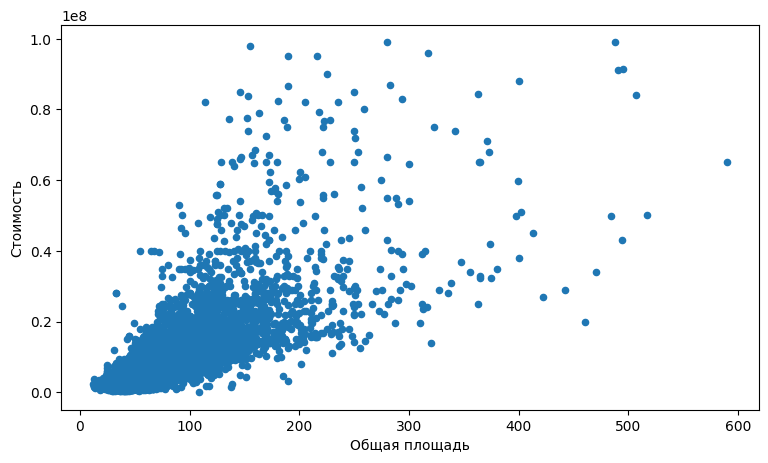

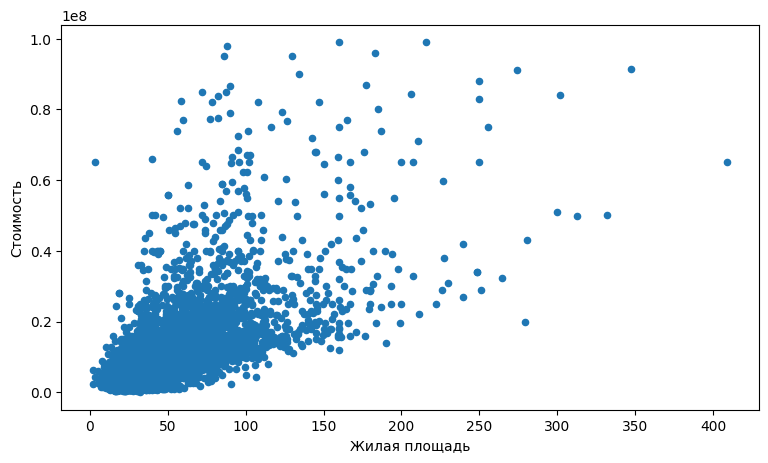

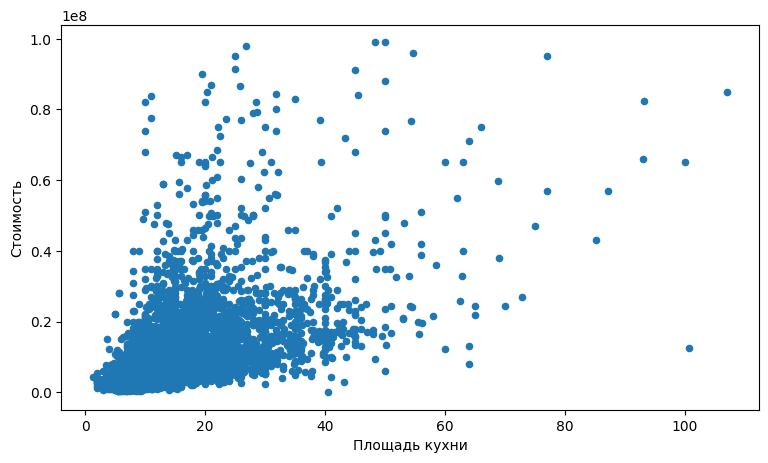

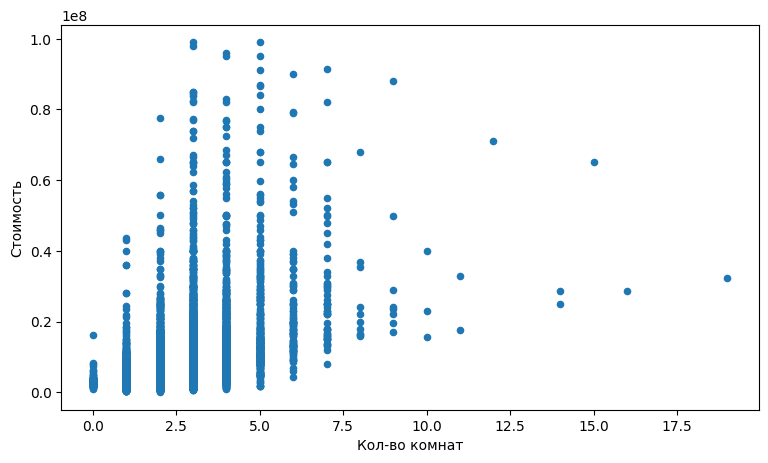

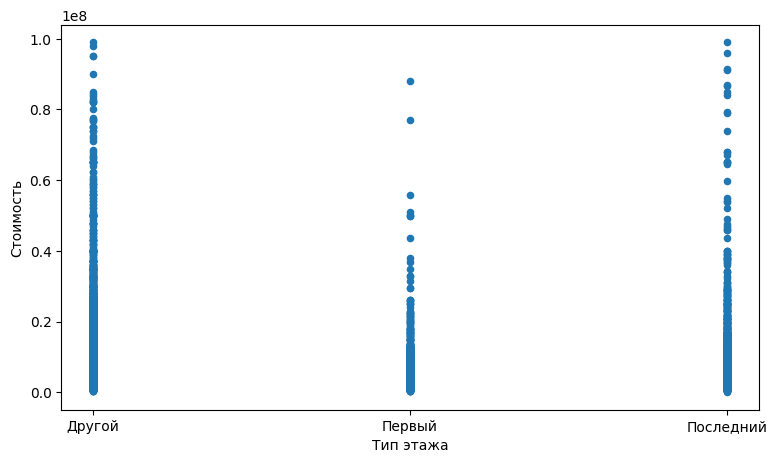

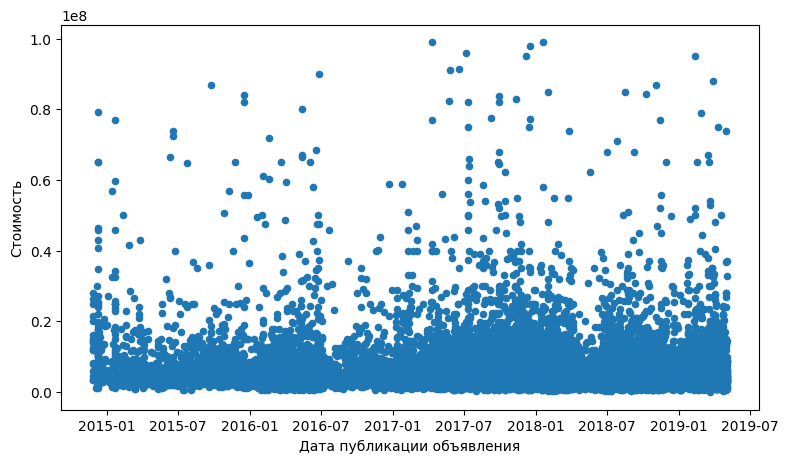

In [48]:
for column, column_name in zip(columns, columns_names):
    data.query('last_price <= 100_000_000')\
        .plot.scatter(y='last_price', x=column, figsize=(9, 5))\
        .set(xlabel=column_name, ylabel='Стоимость')
    plt.show()

Стоимость квартиры сильно коррелирует с её общей площадью, также есть связь с жилой площадью и площадью кухни (предположительно из-за того, что с ними связана общая площадь).
<br>А вот количество комнат практически не влияет на стоимость квартиры.
<br>Что касается даты опубликования объяления, то в июле 2016 и 2018 годов почти все квартиры стоили дешевле `100 млн.руб.`

Дополнительно изучим статистические характеристики квартир, сгруппированных по типу этажа.

In [49]:
data.groupby('floor_type')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
Другой,17439.0,6676208.513447,8612927.817794,450000.0,3600000.0,4850000.0,7000000.0,330000000.0
Первый,2915.0,4804420.305317,5100250.42505,430000.0,2800000.0,3900000.0,5400000.0,135000000.0
Последний,3335.0,7358734.297151,20695639.905971,12190.0,3000000.0,4300000.0,6700000.0,763000000.0


Как правило, квартиры на первом этаже дешевле, чем на последнем, а те, в свою очередь, дешевле остальных.

### 3.4. <a id='toc3_4_'></a>[Средняя цена квадратного метра](#toc0_)

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

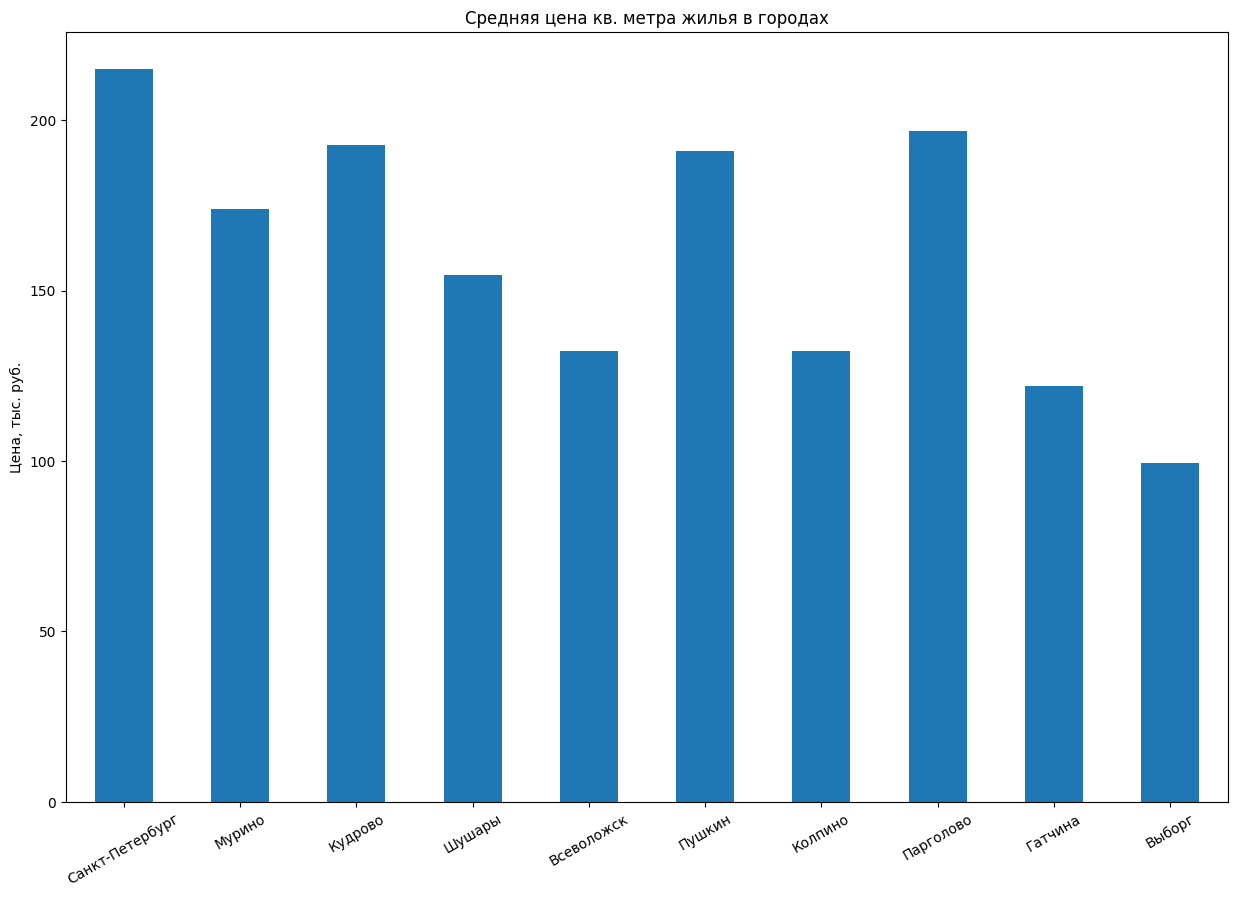

In [50]:
locality_grouped = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc={'count', 'mean'}).astype(int)
locality_grouped.sort_values(by="count", ascending=False).head(10)\
    .apply(lambda x: x/1000)['mean']\
    .plot.bar(figsize=(15, 10))\
    .set(title='Средняя цена кв. метра жилья в городах', ylabel='Цена, тыс. руб.', xlabel='')
plt.xticks(rotation=30);

<div class='alert alert-info'>
Среди населённых пунктов с наибольшим числом объявлений дороже всего квадратный метр жилья в Санкт-Петербурге - более 200000 руб., а дешевле всего - в Выборге: около 100000 руб.
    </div>

### 3.5. <a id='toc3_5_'></a>[Средняя цена каждого километра от центра](#toc0_)

Построим столбчатую диаграмму, где будет указана цена каждого километра от центра Санкт-Петербурга.

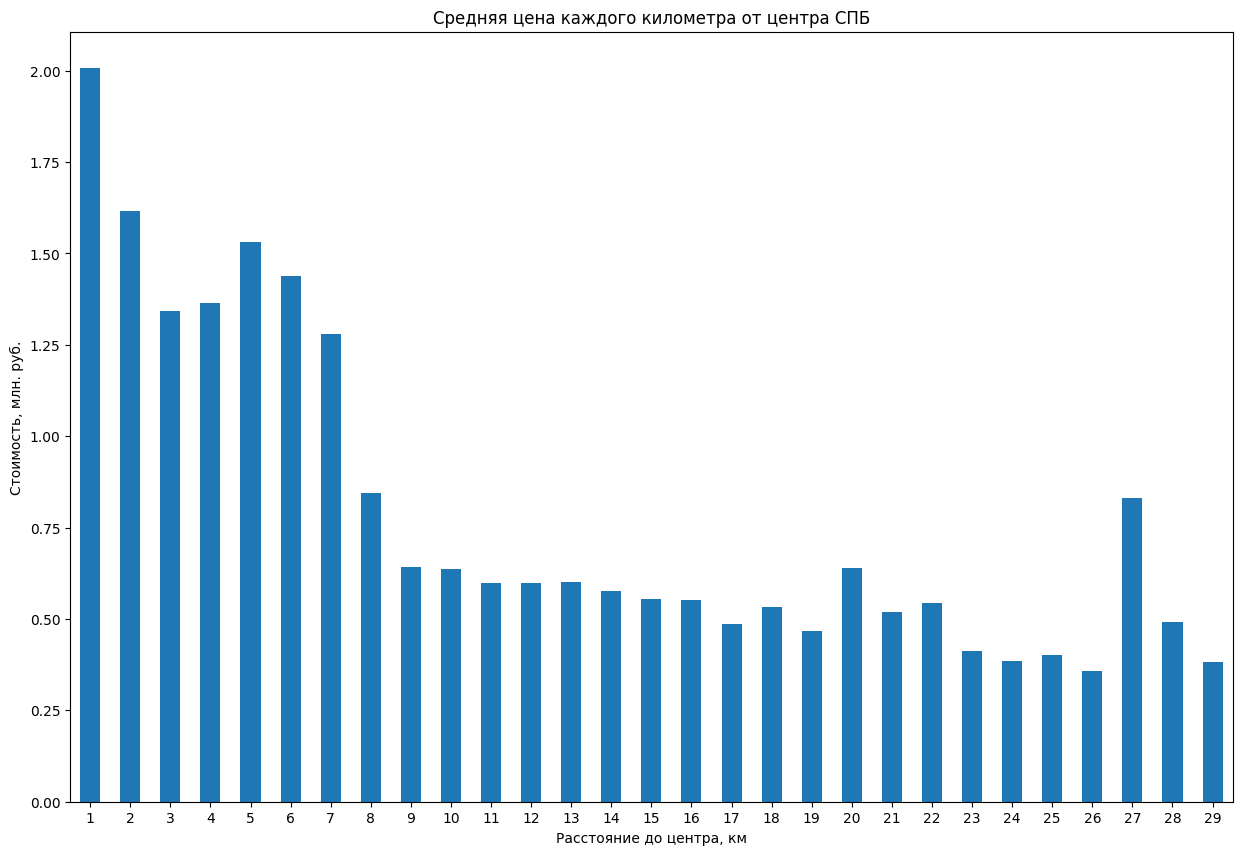

In [51]:
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_distance_km', values='last_price', aggfunc='mean')
    .apply(lambda x: x / 10e6)
    .plot.bar(figsize=(15, 10), legend=False)
    .set(title='Средняя цена каждого километра от центра СПБ', xlabel='Расстояние до центра, км', ylabel='Стоимость, млн. руб.')
)
plt.xticks(rotation=0);

**Вывод по разделу 3:**
- Изучены и описаны различные параметры исследуемого датасета
- Изучены скорость продажи квартир и различные факторы, влияющие на её стоимость, а также стоимость одного квадратного метра жилья в зависимости от местоположения
- Вычислена цена каждого километра от центра Санкт-Петербурга.

### 3.6. <a id='toc3_6_'></a>[Общий вывод](#toc0_)

**В ходе исследования было определено:**
- Наиболее часто квартиры выставляются ранней весной и осенью (пики - февраль и ноябрь), летом - не так часто, реже всего - в мае.
- Многие квартиры продаются в течении 1-6 месяцев со дня публикации объявления и практически все - в течение первых двух лет.

- Стоимость квартиры сильно коррелирует с её общей площадью, также есть связь с жилой площадью и площадью кухни. Количество комнат практически не влияет на стоимость квартиры.
- В июле дорогие квартиры выставляют на продажу реже, чем в другие месяцы.
- Как правило, квартиры на первом этаже дешевле, чем на последнем, а те, в свою очередь, дешевле остальных.
- Самые дорогие квартиры Петербурга находятся в радиусе 7 км от центра.